In [1]:
import pandas as pd

cc =[100, 0, 0, 0]
aaa = [80, 9, 1, 1]
fff = [10, 0, 8, 0]
hhh = [10, 1, 1, 9]

df = pd.DataFrame({'A': cc, 'B': aaa,'C': fff,'D': hhh})
df

,A,B,C,D
0,100,80,10,10
1,0,9,0,1
2,0,1,8,1
3,0,1,0,9


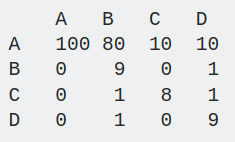
P(A) = 100/ (100 + 0 + 0 +0) = 100

P(B) = 9/ (9 + 80 + 1 + 1) = 9/91 psst... essentially take the true positive of the class and divide up by the column data across rows


In [2]:
DD = df.values
DD

array([[100,  80,  10,  10],
       [  0,   9,   0,   1],
       [  0,   1,   8,   1],
       [  0,   1,   0,   9]])

Definicja podsumowująca listę:

In [3]:
def sumoflist(l):    
    total = 0    
    for i in l:
        total +=i
    return total

Suma kolumn macierzy:

In [4]:
sumC = DD.sum(axis=0) 
sumC

array([100,  91,  18,  21])

Przerabiam na listę:

In [5]:
sumC = list(sumC.flatten())
sumC

[100, 91, 18, 21]

Przekątna macierzy:

In [6]:
import numpy as np

w = DD.diagonal()
w


array([100,   9,   8,   9])

Przerabiam na listę:

In [7]:
w = list(w.flatten())
w

[100, 9, 8, 9]

Suma przekątnej macierzy:

In [8]:
sumoflist(w)

126

Suma wierszy macierzy

In [9]:
sumR = DD.sum(axis=1) 
sumR

array([200,  10,  10,  10])

In [10]:
sumR = list(sumR.flatten())
sumR

[200, 10, 10, 10]

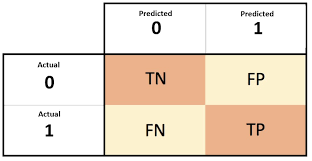

TN dla pierwszego:

In [11]:
w[0]

100

FP dla pierwszego:

In [12]:
sumR[0]-w[0]

100

FN dla pierwszego:

In [13]:
sumC[0]-w[0]

0

TP dla pierwszego:

In [14]:
sumoflist(w) - w[0]

26

In [105]:
#m = confuse matrix
#n = 0


def Multi_matrix6(model,name,n):
    
    global dfv
    
    def sumoflist(l):    
        total = 0    
        for i in l:
            total +=i
        return total
    
    # Przekątna macierzy:
    import numpy as np
    w = model.diagonal()
    w = list(w.flatten())
    TN = w[n]
   
    # Suma wierszy macierzy:
    sumR = model.sum(axis=1)
    sumR = list(sumR.flatten())
    FP = sumR[n]-TN
    
    # Suma kolumn macierzy:
    sumC = model.sum(axis=0) 
    sumC = list(sumC.flatten())
    FN = sumC[0]-TN
    TP = sumoflist(w) - TN
    
    Recall = np.round(TP/(TP+FN),decimals=3)
    Precision = np.round(TP/(TP+FP),decimals=3)
    F1 = np.round((2*(Precision*Recall))/(Precision+Recall),decimals=3)
    FPR = np.round(FP/(FP + TN),decimals=3)
    TPR = np.round(TP/(TP + FN),decimals=3)
    FNR = np.round(FN/(TP + FN),decimals=3)
    SPEC = np.round(TN/(TN + FP),decimals=3)
       
    #return TN, FN, TP, FP, F1, Recall, Precision, FPR,TPR,FNR,SPEC
    dfv = pd.DataFrame({'Model':name,'Recall:': [Recall], 'Precision:': [Precision], 'F1:':[F1],'FPR':[FPR],'TPR':[TPR],'FNR':[FNR],'SPEC':[SPEC]})

    return    dfv 



In [74]:
q=[0,1,2,3]
for t in q:
    Multi_matrix6(DD,t)
    

Recall:    1.0
Recall:    0.562
Recall:    0.562
Recall:    0.562


In [77]:
adres = '/home/wojciech/Pulpit/7/model1.csv'

appended_data = []
for t in q:
    results = Multi_matrix6(DD,t)
    appended_data.append(results)
appended_data = pd.concat(appended_data)
filename = adres                                          #.format(n)
appended_data.to_csv(filename)

Recall:    1.0
Recall:    0.562
Recall:    0.562
Recall:    0.562


TypeError: cannot concatenate object of type '<class 'tuple'>'; only Series and DataFrame objs are valid

In [106]:
Multi_matrix6(DD,'kot',0)

,Model,Recall:,Precision:,F1:,FPR,TPR,FNR,SPEC
0,kot,1.0,0.206,0.342,0.5,1.0,0.0,0.5


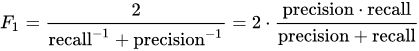

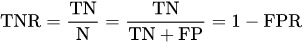

# Wyliczam precision 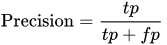

suma kolumn macierzy

In [ ]:
sumC = df.sum(axis=0) 
sumC

In [ ]:
sumC = list(sumC.flatten())
sumC

Przekątna macierzy

In [ ]:
import numpy as np

w = df.diagonal()
w


In [ ]:
w = list(w.flatten())
w

w.X_train = X_train.values

In [ ]:
w[0]/sumC[0]

In [ ]:
w[1]/sumC[1]

In [ ]:
w

In [ ]:
sumC

In [ ]:
for t,g in zip(w,sumC):
    print(t/g)

In [ ]:
lst =[]
for t,g in zip(w,sumC):
    n=(t/g)
    print(n)
    lst.append(n)

In [ ]:
lst

podsumowuje listę

wyliczam średnią

suma elementów z list / ilość elementów z listy

In [ ]:
precision = sumoflist(lst)/len(df)
precision

# Wyliczam recall
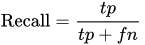

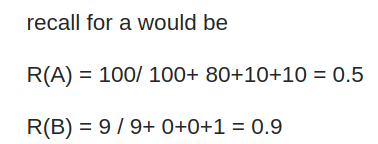

In [ ]:
df

Suma wierszy macierzy

In [ ]:
sumR = df.sum(axis=1) 
sumR

In [ ]:
sumR = list(sumR.flatten())
sumR

In [ ]:
sR = sumoflist(sumR)

Wyliczam recall

In [ ]:
lstR=[]
for t,g in zip(w,sumR):
    n=(t/g)
    print(n)
    lstR.append(n)

In [ ]:
lstR

In [ ]:
recall = sumoflist(lstR)/len(lstR)
recall

# Wyliczam f1
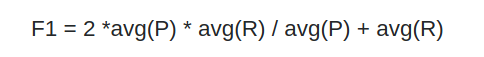

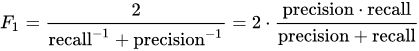

In [ ]:
F1 = (2*precision*recall)/(precision*recall)
F1

## False_Positive_Rate
procentowy udział ludzi zdrowych uznanych przez model za chorych w populacji ludzi zdrowych
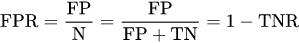

# Wyliczam precision !
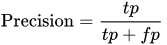

TP = wartość dobrze zdiagnozowanych ludzi chorych

TP+FP = Suma wszystkich wartości w kolumnie w danej klasie 

# Wyliczam recall
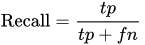

TP = wartość dobrze zdiagnozowanych ludzi chorych

TP+FN = Suma wszystkich wartości w wierszu w danej klasie 

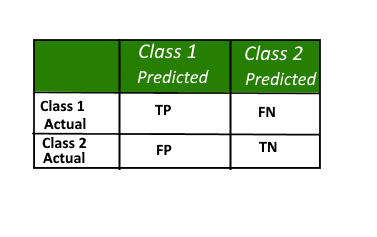

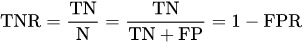

FP = suma wszystkich wierszy macierzy - suma wiersza klasy

TN = suma przekątnej macierzy - TP 

Przekątna macierzy:

In [ ]:
w

Suma przekątnej macierzy:

In [ ]:
 sumoflist(w)

TP dla pierwszego

In [ ]:
w[0]

In [ ]:
TN = sumoflist(w)-w[0]
TN

FP dla pierwszego

In [ ]:
n = sumC-w[0]
sumoflist(n)

In [35]:
def Multi_matrix(M,n):
    
    global TN, FN, TP, FP, F1, Recall, Precision, FPR,TPR,TNR,FNR,SPEC
    
    def sumoflist(l):    
        total = 0    
        for i in l:
            total +=i
        return total
    
    # Przekątna macierzy:
    import numpy as np
    w = M.diagonal()
    w = list(w.flatten())
    TN = w[n]
    
    ## obliczam indywidualne średnie odrazu
    q=[0,1,2,3,4,5,6]
    for t in q:
        print(w[q])

    
    # Suma wierszy macierzy:
    sumR = M.sum(axis=1)
    sumR = list(sumR.flatten())
    FP = sumR[n]-TN
    
    # Suma kolumn macierzy:
    sumC = M.sum(axis=0) 
    sumC = list(sumC.flatten())
    FN = sumC[0]-TN
    TP = sumoflist(w) - TN
    
    Recall = np.round(TP/(TP+FN),decimals=3)
    Precision = np.round(TP/(TP+FP),decimals=3)
    F1 = np.round((2*(Precision*Recall))/(Precision+Recall),decimals=3)
    FPR = np.round(FP/(FP + TN),decimals=3)
    TPR = np.round(TP/(TP + FN),decimals=3)
    FNR = np.round(FN/(TP + FN),decimals=3)
    SPEC = np.round(TN/(TN + FP),decimals=3)
    
    print('TN:       ', TN)
    print('FP:       ', FP)
    print('FN:       ', FN)
    print('TP:       ', TP)
    print('Recall:   ', Recall)
    print('Precision:', Precision)
    print('F1:       ', F1)
    print('FPR:      ', FPR)
    print('TPR:      ', TPR)
    print('FNR:      ', FNR)
    print('SPEC:     ', SPEC)
    
    
    return TN, FN, TP, FP, F1, Recall, Precision, FPR,TPR,FNR,SPEC